<a href="https://colab.research.google.com/github/BR-Lab/ML-algorithm/blob/main/Decision_Tree_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 실습

## 0.Introduction

<분석 모델>
*  moons dataset으로 실습용 Toy dataset 생성 
*  decision tree model 학습
*  hyperparameter에 따른 예측 성능 및 학습 상태 관찰하기 위해 plot tree 활용


<그 외>
*  regression 모델도 구축해보기

## 1.import module

In [ ]:
#fashion mnist 데이터 패키지
from sklearn.datasets import make_moons

#데이터 전처리 패키지
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML model 구축
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

#데이터 시각화 패키지
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

#예측 결과 지표 패키지
from sklearn.metrics import accuracy_score, r2_score

#한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

#기타
import warnings, itertools, time
warnings.filterwarnings(action = 'ignore')

## 2.데이터 불러오기 & 전처리

In [ ]:
# Stat을 고정해서 같은 수에 대해서는 같은 데이터가 만들어지도록 설정
random_state = 2021

# 데이터 개수는 1000개로 설정
n_samples = 1000

# moons 분류 데이터 생성
feature, target = make_moons(n_samples = n_samples, noise = 0.2, random_state = random_state)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


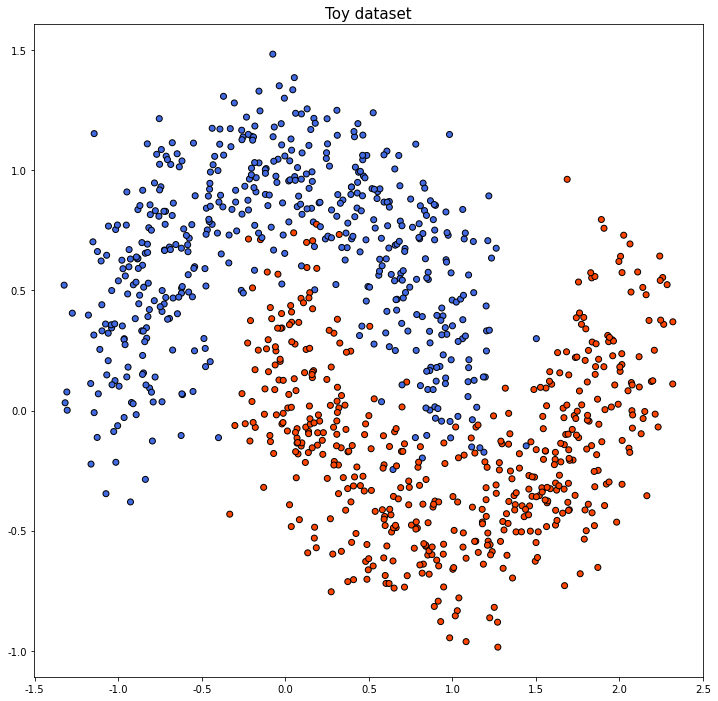

In [ ]:
cmap = ListedColormap(['royalblue', 'orangered']) # Toy dataset 시각화를 위한 색

fig = plt.figure(figsize = (12,12))
plt.scatter(feature[:,0], feature[:,1], c = target, edgecolor = 'k', cmap = cmap)
plt.title('Toy dataset', fontsize = 15)

plt.show()

## 3.model 학습하기

### 3.1 model 학습


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state=random_state)

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = DecisionTreeClassifier(max_depth=3) # tree의 최대 depth 제한 가능. 
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###3.2 예측 결과 확인 및 학습 상태 체크


In [ ]:
# train, test acc
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('Training Accuracy:  {:.3f}'.format(acc_train))
print('Testing Accuracy:  {:.3f}'.format(acc_test))

Training Accuracy:  0.921
Testing Accuracy:  0.910


In [ ]:
#시각화를 위한 격자 생성
feature = scaler.transform(feature)

x_min, x_max = feature[:, 0].min() - .5, feature[:, 0].max() + .5
y_min, y_max = feature[:, 1].min() - .5, feature[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])  #column concat = np.hstack

In [ ]:
# 격자 공간에 대한 예측 확률값
y_pred_prob = model.predict_proba(grid)[:,1]

# Contour
Z = y_pred_prob.reshape(xx.shape)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


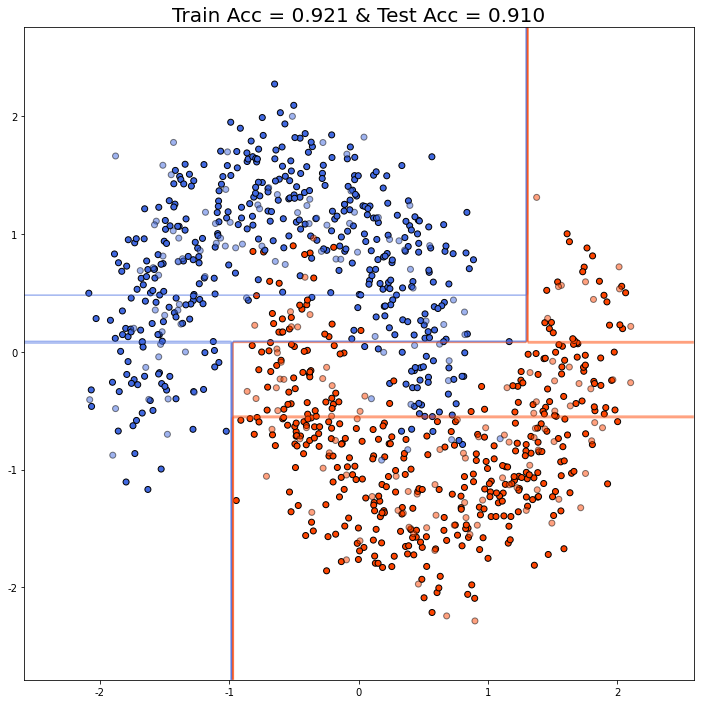

In [ ]:
# 시각화 contour를 먼저 그리고 test는 약간 투명하게 표기
plt.figure(figsize=(12,12))

plt.contour(xx,yy,Z, alpha=0.5, cmap=cmap)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', cmap = cmap)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k', alpha=0.5, cmap=cmap)
plt.title("Train Acc = {:.3f} & Test Acc = {:.3f}".format(acc_train, acc_test), fontsize=20)

plt.show()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


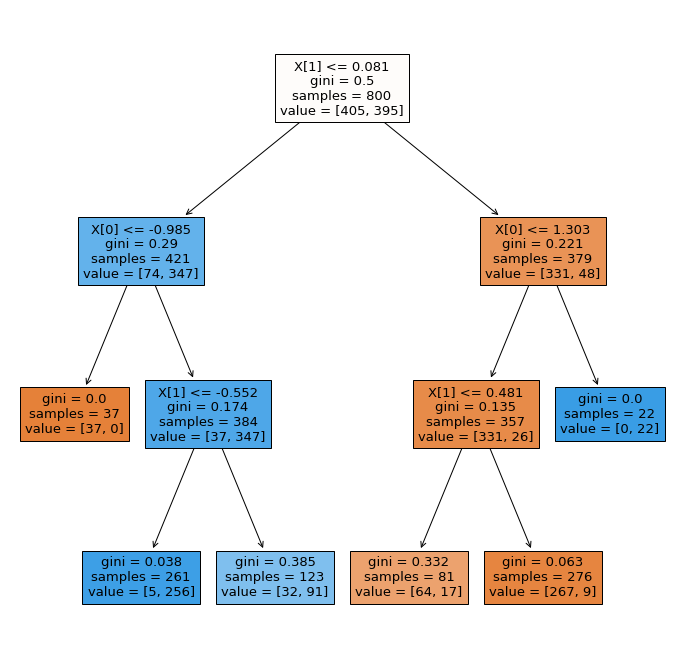

In [ ]:
# 학습에 사용된 decision tree 규칙 시각화
plt.figure(figsize=(12,12))
plot_tree(decision_tree=model, filled=True)
plt.show()

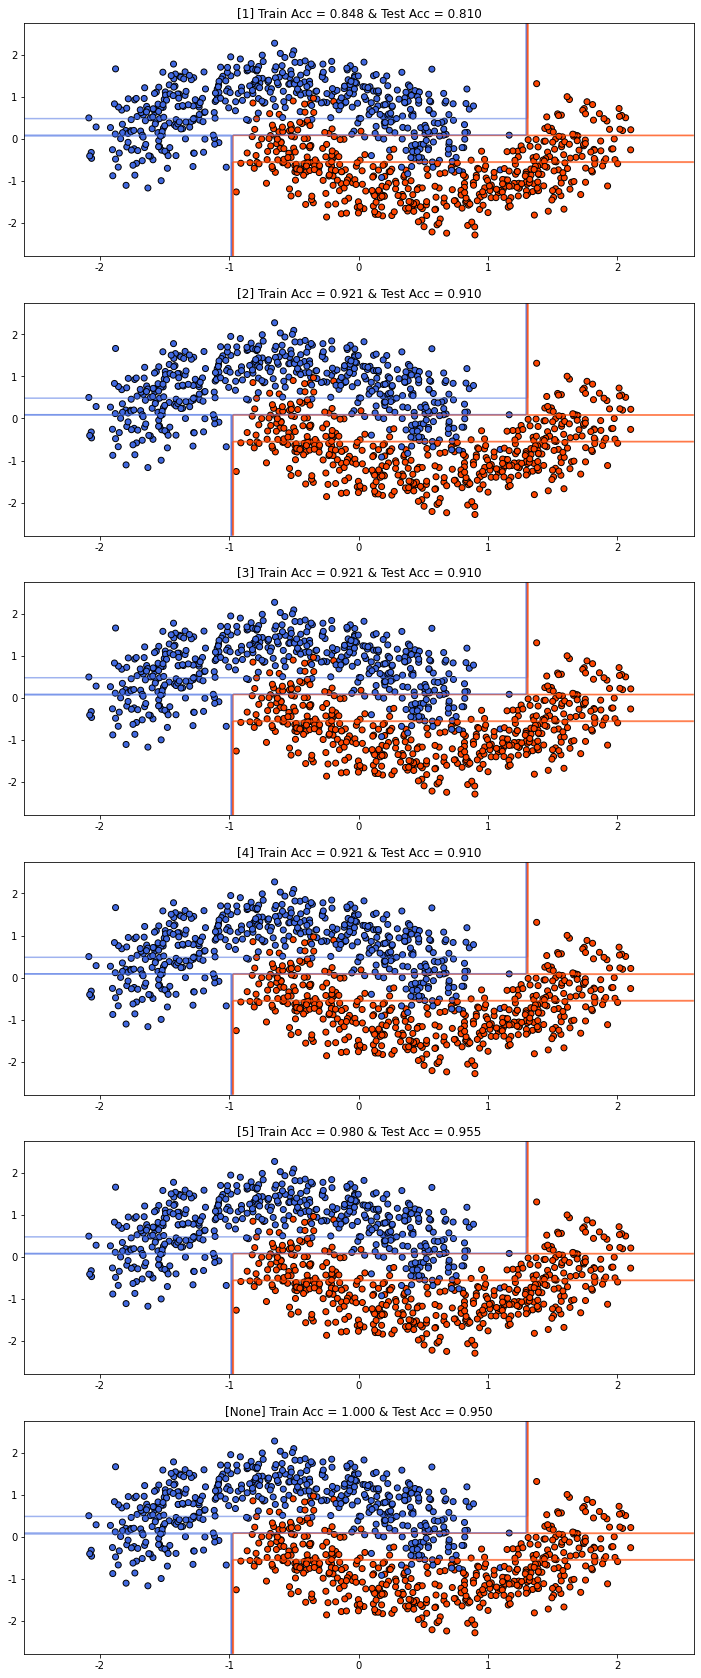

In [ ]:
max_depths = [1,2,3,4,5,None]
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(12,30))
axs = axs.ravel()

for i, max_depth in enumerate(max_depths):

  model = DecisionTreeClassifier(max_depth=max_depth)
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  acc_train = accuracy_score(y_train, y_train_pred)
  acc_test = accuracy_score(y_test, y_test_pred)

  y_pred_prob = model.predict_proba(grid)[:,1]

  axs[i].contour(xx,yy,Z,alpha=0.5, cmap = cmap)
  axs[i].scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', cmap=cmap)
  axs[i].scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor='k', cmap=cmap)
  axs[i].set_title('[{}] Train Acc = {:.3f} & Test Acc = {:.3f}'.format(max_depth, acc_train, acc_test))

plt.show()
  

##4.Regression model 구축하기

###4.1 데이터 생성

$y = \sin(x) + \epsilon N(0,0.5^2)$

In [ ]:
random_state = 2021
n_samples = 1000

np.random.seed(random_state)

X = np.random.rand(n_samples, 1) * 10 #np.random.rand(a,b): 행 a개, 열 b개인 uniform 분포 (0,1) 난수 생성
X = np.sort(X, axis=0) # 행렬기준으로 크기순 나열

y = np.sin(X).reshape(-1,) + np.random.randn(n_samples) * 0.5

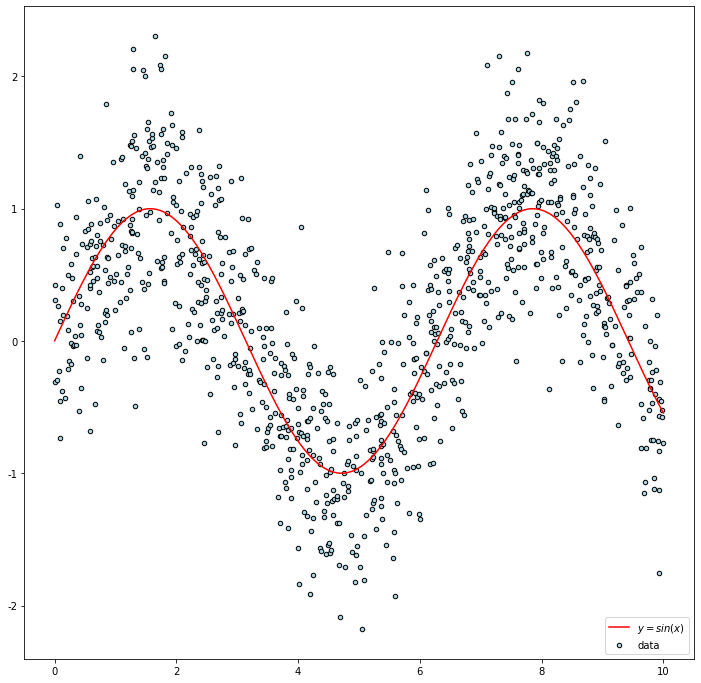

In [ ]:
# 시각화
plt.figure(figsize=(12,12))
plt.scatter(X,y, s=20, edgecolors='black', c='lightblue', label='data')
plt.plot(X, np.sin(X), c='red', label='$y=sin(x)$')
plt.legend(loc='lower right')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=random_state)

sort_idx = np.argsort(X_test, axis=0).reshape(-1)
X_test, y_test = X_test[sort_idx], y_test[sort_idx]

model = DecisionTreeRegressor(max_depth = None)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

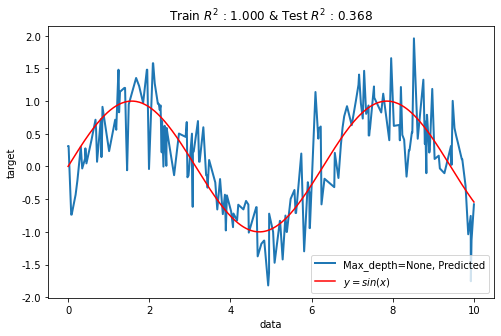

In [ ]:
y_test_pred = model.predict(X_test)

plt.figure(figsize=(8,5))

plt.plot(X_test, y_test_pred, linewidth = 2, label='Max_depth=None, Predicted')
plt.plot(X, np.sin(X), c='red', label='$y=sin(x)$')

plt.xlabel('data')
plt.ylabel('target')
plt.legend(loc='lower right')
train_r2 = r2_score(y_pred=model.predict(X_train), y_true = y_train)
test_r2 = r2_score(y_pred=y_test_pred, y_true = y_test)

plt.title('Train $R^2$ : {:.3f} & Test $R^2$ : {:.3f}'.format(train_r2, test_r2))
plt.show()

Font 'default' does not have a glyph for '\uc815' [U+c815], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub2f5' [U+b2f5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc120' [U+c120], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc815' [U+c815], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub2f5' [U+b2f5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc120' [U+c120], substituting with a dummy symbol.


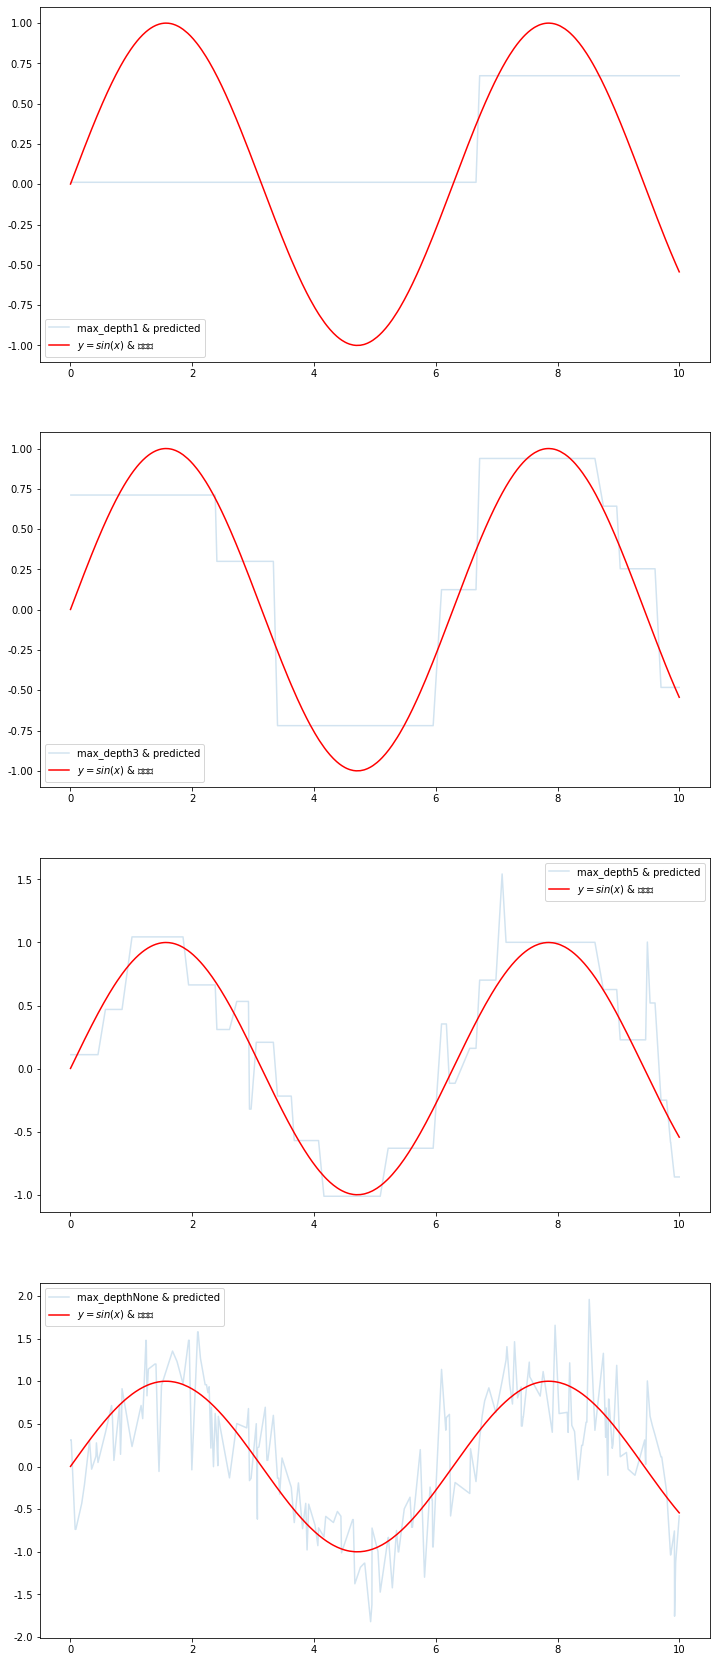

In [ ]:
max_depths = [1,3,5,None]
train_r2 = []
test_r2 = []

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12,30))
axs = axs.ravel()

for i, max_depth in enumerate(max_depths):

  model = DecisionTreeRegressor(max_depth=max_depth)
  model.fit(X_train, y_train)

  y_test_pred = model.predict(X_test)

  axs[i].plot(X_test, y_test_pred, label='max_depth{} & predicted'.format(max_depth), linewidth=1.5, alpha=0.2)
  axs[i].plot(X, np.sin(X), c='red', label='$y=sin(x)$ & 정답선')

  train_r2.append(r2_score(y_pred=model.predict(X_train), y_true = y_train))
  test_r2.append(r2_score(y_pred=y_test_pred, y_true = y_test))

  axs[i].legend()

plt.show()

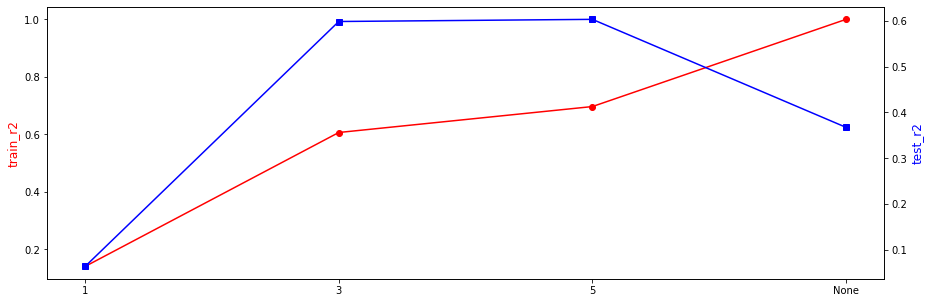

In [ ]:
fit, ax = plt.subplots(figsize=(15,5))

xticks = list(map(str, max_depths))

ax.plot(range(len(max_depths)), train_r2, color='red', marker='o')
ax.set_ylabel('train_r2', color = 'red', fontsize = 12)

ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), test_r2, color='blue', marker='s')
ax2.set_ylabel('test_r2',  color = 'blue', fontsize = 12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

EOD